# Brain Tumor Segmentation using SLIC

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_GRAYSCALE)

# #simple global thresholding
# ret,th1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY)

# plt.figure(figsize=(12,6))
# plt.subplot(121), plt.imshow(img,cmap='gray')
# plt.title('Grayscale Image')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(th1,cmap='gray')
# plt.title('Binary Image (Threshold: '+str(ret)+')')
# plt.xticks([]),plt.yticks([])
# plt.show()

In [3]:
# # morphological operations
# kernel = np.ones((5, 5), np.uint8)
# closing = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations=7)

# # Display the original and the result
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(th1, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Morphological Opening')
# plt.imshow(closing, cmap='gray')
# plt.axis('off')

# plt.show()

In [4]:
# import cv2
# import numpy as np
# from skimage.segmentation import mark_boundaries
# from skimage.segmentation import slic
# import matplotlib.pyplot as plt

# # Read the image
# img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_COLOR)

# # Convert the image from BGR to RGB (for display with matplotlib)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Perform SLIC segmentation
# segments = slic(img, n_segments=100, compactness=10)

# # Create a mask using the segments
# mask = np.zeros_like(img)
# for seg_val in np.unique(segments):
#     mask[segments == seg_val] = np.mean(img[segments == seg_val], axis=(0, 1))

# # Display the original image and SLIC segmentation result
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# ax[0].imshow(img_rgb)
# ax[0].set_title('Original Image')

# ax[1].imshow(mark_boundaries(img_rgb, segments))
# ax[1].set_title('SLIC Segmentation')

# plt.show()


In [5]:
!pip install scikit-image
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


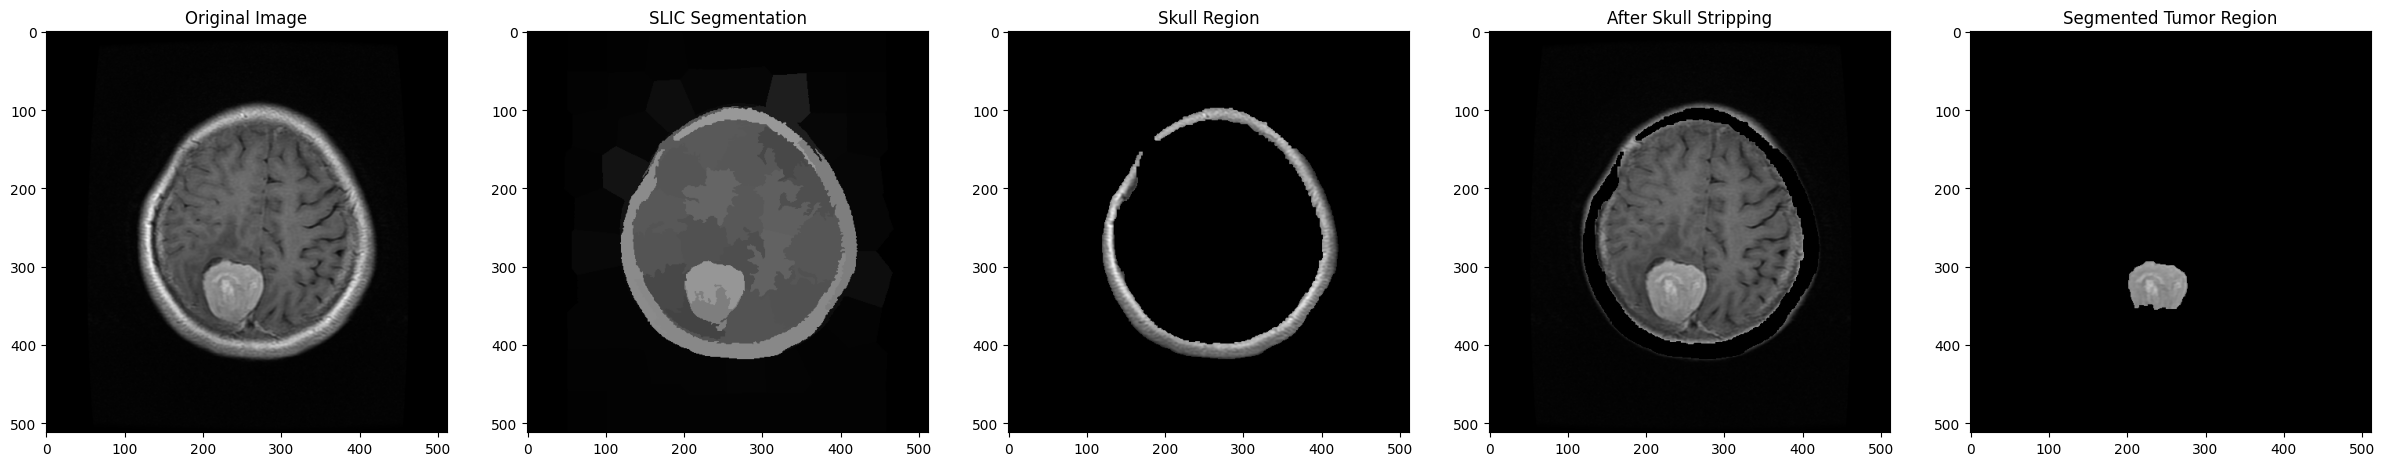

In [6]:
import cv2
import numpy as np
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt

# Function to perform SLIC segmentation and get tumor region
def get_tumor_region(internal_info):
    # Perform SLIC segmentation on the internal information
    segments_internal = slic(internal_info, n_segments=100, compactness=10)

    # Create a mask using the segments
    mask_internal = np.zeros_like(internal_info)
    for seg_val in np.unique(segments_internal):
        mask_internal[segments_internal == seg_val] = np.mean(internal_info[segments_internal == seg_val], axis=(0, 1))

    # Convert the mask to HSV color space for better tumor color representation
    hsv_mask_internal = cv2.cvtColor(mask_internal, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for tumor color in HSV
    lower_bound_internal = np.array([0, 0, 100], dtype=np.uint8)
    upper_bound_internal = np.array([255, 255, 255], dtype=np.uint8)

    # Threshold the image to extract the tumor region
    tumor_mask_internal = cv2.inRange(hsv_mask_internal, lower_bound_internal, upper_bound_internal)

    # Apply morphological operations to refine the segmentation
    kernel_internal = np.ones((5, 5), np.uint8)
    tumor_mask_internal = cv2.morphologyEx(tumor_mask_internal, cv2.MORPH_CLOSE, kernel_internal)
    tumor_mask_internal = cv2.morphologyEx(tumor_mask_internal, cv2.MORPH_OPEN, kernel_internal)

    # Find contours in the binary mask
    contours_internal, _ = cv2.findContours(tumor_mask_internal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Keep the contour with the largest area
    if contours_internal:
        largest_contour_internal = max(contours_internal, key=cv2.contourArea)
        tumor_mask_internal = np.zeros_like(tumor_mask_internal)
        cv2.drawContours(tumor_mask_internal, [largest_contour_internal], -1, (255), thickness=cv2.FILLED)

    return tumor_mask_internal

# Read the image
img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/181.png', cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB (for display with matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform SLIC segmentation
segments = slic(img, n_segments=100, compactness=10)

# Create a mask using the segments
mask = np.zeros_like(img)
for seg_val in np.unique(segments):
    mask[segments == seg_val] = np.mean(img[segments == seg_val], axis=(0, 1))

# Convert the mask to HSV color space for better tumor color representation
hsv_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for tumor color in HSV
lower_bound = np.array([0, 0, 100], dtype=np.uint8)
upper_bound = np.array([255, 255, 255], dtype=np.uint8)

# Threshold the image to extract the tumor region
tumor_mask = cv2.inRange(hsv_mask, lower_bound, upper_bound)

# Apply morphological operations to refine the segmentation
kernel = np.ones((5, 5), np.uint8)
tumor_mask = cv2.morphologyEx(tumor_mask, cv2.MORPH_CLOSE, kernel)
tumor_mask = cv2.morphologyEx(tumor_mask, cv2.MORPH_OPEN, kernel)

# Find contours in the binary mask
contours, _ = cv2.findContours(tumor_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Keep the contour with the largest area
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    tumor_mask = np.zeros_like(tumor_mask)
    cv2.drawContours(tumor_mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

# Apply the binary mask to the original image
segmented_image = cv2.bitwise_and(img_rgb, img_rgb, mask=tumor_mask)

# Get internal information without the skull
internal_info = cv2.subtract(img_rgb, cv2.cvtColor(tumor_mask, cv2.COLOR_GRAY2RGB))

# Get tumor region from internal information
tumor_mask_internal = get_tumor_region(internal_info)

# Apply the binary mask to the original image
segmented_image_internal = cv2.bitwise_and(internal_info, internal_info, mask=tumor_mask_internal)

# Display the original image, SLIC segmentation result, segmented tumor region, internal information, and segmented tumor region from internal info
fig, ax = plt.subplots(1, 5, figsize=(30, 6))

ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')

ax[1].imshow(mask)
ax[1].set_title('SLIC Segmentation')

ax[2].imshow(segmented_image)
ax[2].set_title('Skull Region')

ax[3].imshow(internal_info)
ax[3].set_title('After Skull Stripping')

ax[4].imshow(segmented_image_internal)
ax[4].set_title('Segmented Tumor Region')

plt.show()


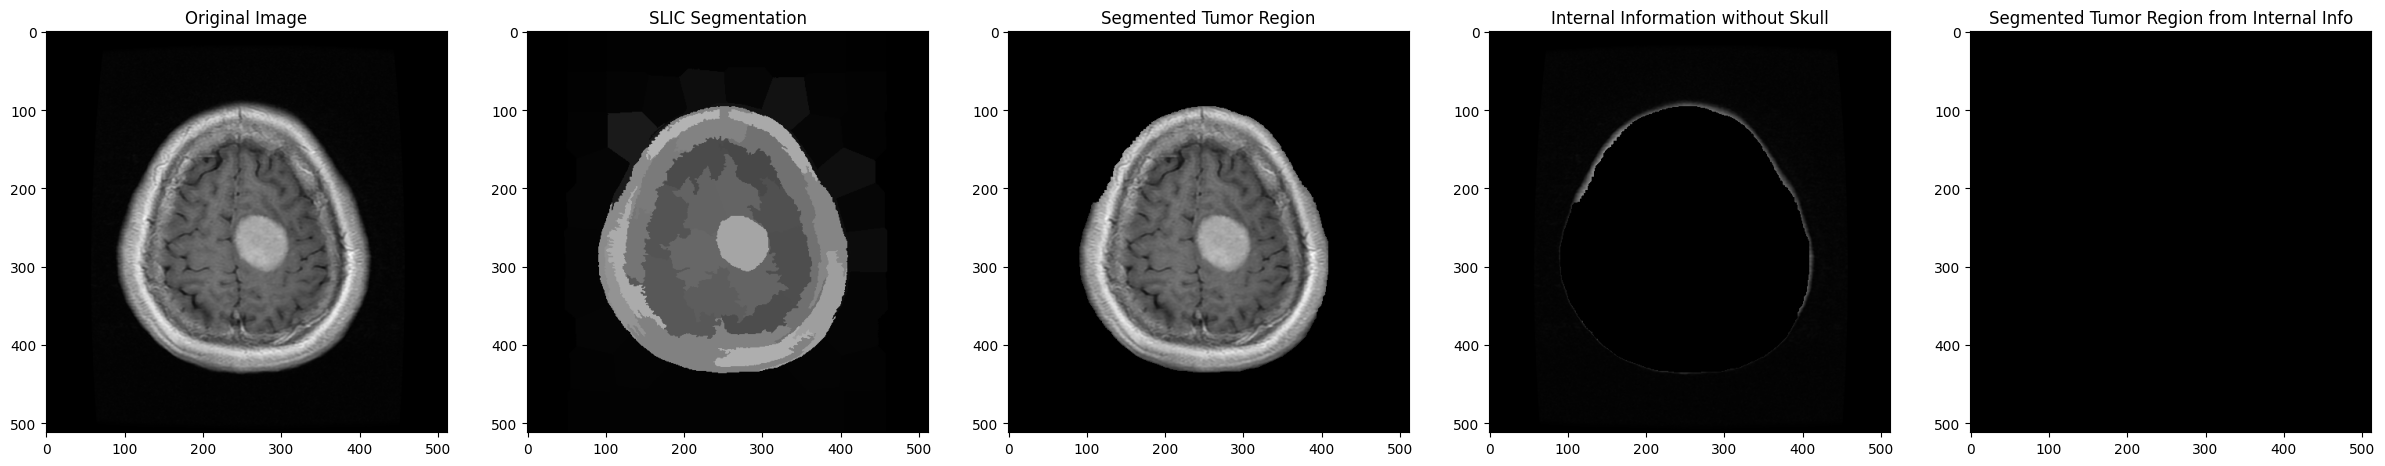

In [7]:
import cv2
import numpy as np
from skimage.segmentation import slic
import matplotlib.pyplot as plt

# Function to perform SLIC segmentation and get tumor region
def get_tumor_region(internal_info):
    # Perform SLIC segmentation on the internal information
    segments_internal = slic(internal_info, n_segments=100, compactness=10)

    # Create a mask using the segments
    mask_internal = np.zeros_like(internal_info)
    for seg_val in np.unique(segments_internal):
        mask_internal[segments_internal == seg_val] = np.mean(internal_info[segments_internal == seg_val], axis=(0, 1))

    # Convert the mask to HSV color space for better tumor color representation
    hsv_mask_internal = cv2.cvtColor(mask_internal, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for tumor color in HSV
    lower_bound_internal = np.array([0, 0, 100], dtype=np.uint8)
    upper_bound_internal = np.array([255, 255, 255], dtype=np.uint8)

    # Threshold the image to extract the tumor region
    tumor_mask_internal = cv2.inRange(hsv_mask_internal, lower_bound_internal, upper_bound_internal)

    # Apply morphological operations to refine the segmentation
    kernel_internal = np.ones((5, 5), np.uint8)
    tumor_mask_internal = cv2.morphologyEx(tumor_mask_internal, cv2.MORPH_CLOSE, kernel_internal)
    tumor_mask_internal = cv2.morphologyEx(tumor_mask_internal, cv2.MORPH_OPEN, kernel_internal)

    # Find contours in the binary mask
    contours_internal, _ = cv2.findContours(tumor_mask_internal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Keep the contour with the largest area
    if contours_internal:
        largest_contour_internal = max(contours_internal, key=cv2.contourArea)
        tumor_mask_internal = np.zeros_like(tumor_mask_internal)
        cv2.drawContours(tumor_mask_internal, [largest_contour_internal], -1, (255), thickness=cv2.FILLED)

    return tumor_mask_internal

# Read the image
img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/60.png', cv2.IMREAD_COLOR)

# Convert the image from BGR to RGB (for display with matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform SLIC segmentation
segments = slic(img, n_segments=100, compactness=10)

# Create a mask using the segments
mask = np.zeros_like(img)
for seg_val in np.unique(segments):
    mask[segments == seg_val] = np.mean(img[segments == seg_val], axis=(0, 1))

# Convert the mask to HSV color space for better tumor color representation
hsv_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for tumor color in HSV
lower_bound = np.array([0, 0, 100], dtype=np.uint8)
upper_bound = np.array([255, 255, 255], dtype=np.uint8)

# Threshold the image to extract the tumor region
tumor_mask = cv2.inRange(hsv_mask, lower_bound, upper_bound)

# Apply morphological operations to refine the segmentation
kernel = np.ones((15,15), np.uint8)
tumor_mask = cv2.morphologyEx(tumor_mask, cv2.MORPH_CLOSE, kernel)
tumor_mask = cv2.morphologyEx(tumor_mask, cv2.MORPH_OPEN, kernel)

# Fill holes in the binary mask using morphological operations
tumor_mask = cv2.morphologyEx(tumor_mask, cv2.MORPH_CLOSE, kernel)
tumor_mask = cv2.morphologyEx(tumor_mask, cv2.MORPH_OPEN, kernel)

# Find contours in the binary mask
contours, _ = cv2.findContours(tumor_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Keep the contour with the largest area
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    tumor_mask = np.zeros_like(tumor_mask)
    cv2.drawContours(tumor_mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

# Apply the binary mask to the original image
segmented_image = cv2.bitwise_and(img_rgb, img_rgb, mask=tumor_mask)

# Get internal information without the skull
internal_info = cv2.subtract(img_rgb, cv2.cvtColor(tumor_mask, cv2.COLOR_GRAY2RGB))

# Get tumor region from internal information
tumor_mask_internal = get_tumor_region(internal_info)

# Apply the binary mask to the internal information
segmented_image_internal = cv2.bitwise_and(internal_info, internal_info, mask=tumor_mask_internal)

# Display the original image, SLIC segmentation result, segmented tumor region, internal information, and segmented tumor region from internal info
fig, ax = plt.subplots(1, 5, figsize=(30, 6))

ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')

ax[1].imshow(mask)
ax[1].set_title('SLIC Segmentation')

ax[2].imshow(segmented_image)
ax[2].set_title('Segmented Tumor Region')

ax[3].imshow(internal_info)
ax[3].set_title('Internal Information without Skull')

ax[4].imshow(segmented_image_internal)
ax[4].set_title('Segmented Tumor Region from Internal Info')

plt.show()
